## 0 Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import sys
from scipy.spatial import distance
from tqdm.notebook import tqdm
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (12,5)

# 1. Відкрити та зчитати наданий файл з даними.

In [7]:
df = pd.read_csv(r"data/WQ-R.csv",sep=";")

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2. Визначити та вивести кількість записів.

In [9]:
print(f"N rows - {df.shape[0]}\nN cols - {df.shape[1]}")

N rows - 1599
N cols - 12


# 3. Видалити атрибут quality.

In [10]:
y = df["quality"].astype(int)
X = df.drop(["quality"], axis = 1)

# 4. Вивести атрибути, що залишилися.

In [11]:
(y.value_counts().sort_index()/y.shape[0]*100).round(2)

3     0.63
4     3.31
5    42.59
6    39.90
7    12.45
8     1.13
Name: quality, dtype: float64

In [12]:
labels = X.columns
print(f"Features:\n{X.columns.to_list()}")

Features:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


# 5. Використовуючи функцію KMeans бібліотеки scikit-learn, виконати
розбиття набору даних на кластери з випадковою початковою
ініціалізацією і вивести координати центрів кластерів.
Оптимальну кількість кластерів визначити на основі початкового
набору даних трьома різними способами:

 1) elbow method;
 
 2) average silhouette method;
 
 3) prediction strength method 
 
 (див. п. 9.2.3 Determining the Number of Clusters книжки Andriy Burkov. The Hundred-Page Machine Learning Book).
Отримані результати порівняти і пояснити, який метод дав кращий
результат і чому так (на Вашу думку).

## 5.1) Elbow method

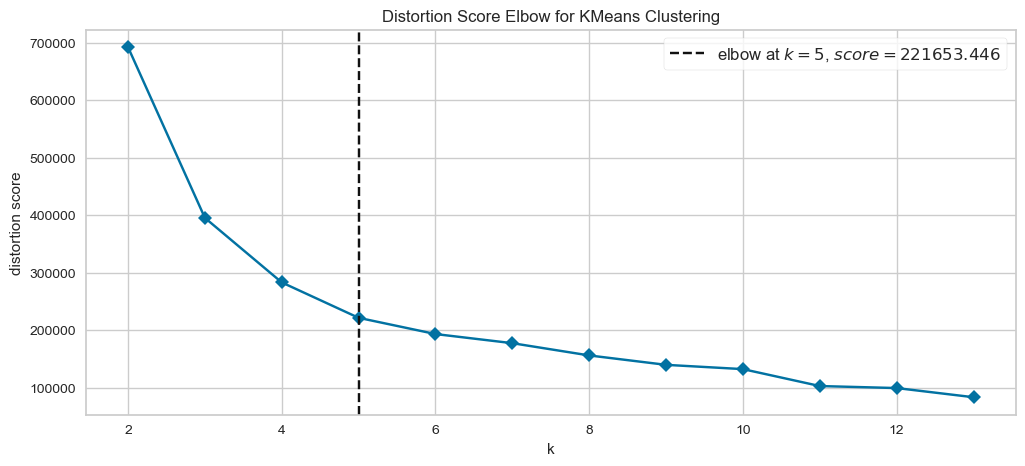

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# Instantiate the clustering model and visualizer
model = KMeans(init='random', random_state=42)
visualizer = KElbowVisualizer(
    model, k=(2,14), metric='distortion', timings=False
)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

Center`s coordinates for n_clusters 2:
         0         1         2         3         4          5          6         7         8         9          10
0  8.424258  0.519334  0.266539  2.394275  0.085446  12.371925  30.344360  0.996677  3.315522  0.656531  10.540218
1  8.025952  0.551643  0.283429  2.944524  0.093138  25.708333  91.728571  0.996943  3.298738  0.662690  10.093889

Center`s coordinates for n_clusters 3:
         0         1         2         3         4          5           6         7         8         9          10
0  8.286996  0.520504  0.272436  2.497070  0.091310  21.570513   54.888278  0.996856  3.320201  0.677106  10.376801
1  7.887552  0.572365  0.275643  3.232365  0.088398  26.151452  108.506224  0.996935  3.289627  0.652033  10.008921
2  8.469828  0.519520  0.268608  2.361022  0.084606   8.995074   22.392857  0.996618  3.311379  0.647217  10.576929

Center`s coordinates for n_clusters 4:
         0         1         2         3         4          5           

Center`s coordinates for n_clusters 12:
          0         1         2         3         4          5           6         7         8         9          10
0   8.041429  0.563929  0.310429  3.317143  0.090957  32.321429  133.857143  0.997265  3.242429  0.710000   9.732857
1   8.802899  0.532101  0.291667  2.622826  0.102775  12.967391   48.101449  0.997454  3.276232  0.674783  10.249275
2   8.531224  0.527679  0.283333  2.435021  0.086257   5.054852   12.337553  0.996343  3.306414  0.619283  10.803165
3   8.010959  0.521438  0.221507  2.291096  0.080966  18.226027   37.890411  0.996326  3.356644  0.655411  10.628425
4   9.007173  0.501835  0.314979  2.517932  0.084422   7.818565   20.607595  0.997076  3.271857  0.674979  10.488608
5   8.294366  0.507394  0.287465  3.576761  0.099634  37.943662   74.901408  0.997241  3.310986  0.676197  10.192254
6   8.778400  0.535400  0.266480  2.294400  0.084232   8.584000   32.536000  0.997420  3.299280  0.622080  10.149333
7   7.619310  0.515621  

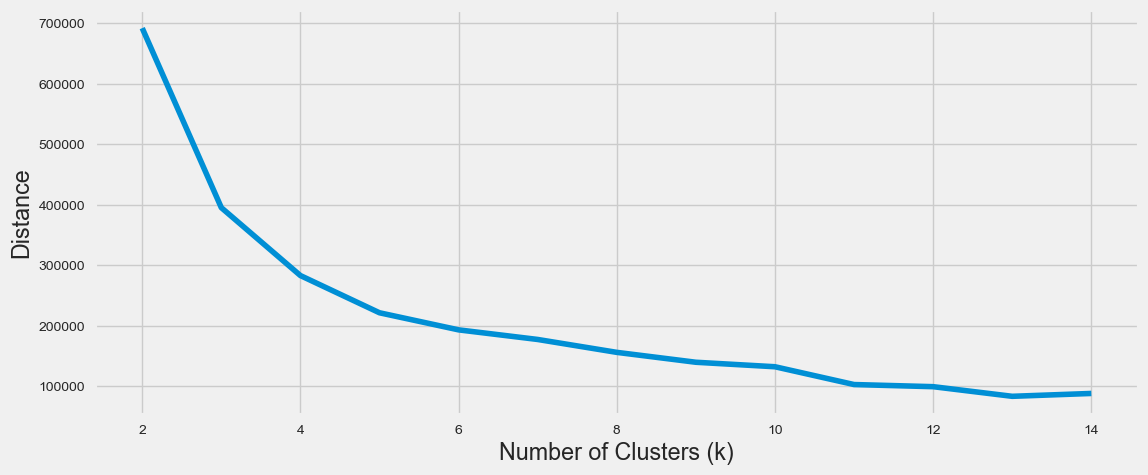

In [14]:
avg_distance = []
range_n_clusters = range(2, 15)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, init='random', random_state=42).fit(X)
    print(f'Center`s coordinates for n_clusters {n_clusters}:\n{pd.DataFrame(clusterer.cluster_centers_).to_string()}\n')
    avg_distance.append(clusterer.inertia_)

style.use("fivethirtyeight")
plt.plot(range_n_clusters, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

## 5.2) Average silhouette method

Center`s coordinates for n_clusters 2:
         0         1         2         3         4          5          6         7         8         9          10
0  8.424258  0.519334  0.266539  2.394275  0.085446  12.371925  30.344360  0.996677  3.315522  0.656531  10.540218
1  8.025952  0.551643  0.283429  2.944524  0.093138  25.708333  91.728571  0.996943  3.298738  0.662690  10.093889

Center`s coordinates for n_clusters 3:
         0         1         2         3         4          5           6         7         8         9          10
0  8.286996  0.520504  0.272436  2.497070  0.091310  21.570513   54.888278  0.996856  3.320201  0.677106  10.376801
1  7.887552  0.572365  0.275643  3.232365  0.088398  26.151452  108.506224  0.996935  3.289627  0.652033  10.008921
2  8.469828  0.519520  0.268608  2.361022  0.084606   8.995074   22.392857  0.996618  3.311379  0.647217  10.576929

Center`s coordinates for n_clusters 4:
         0         1         2         3         4          5           

Center`s coordinates for n_clusters 12:
          0         1         2         3         4          5           6         7         8         9          10
0   8.041429  0.563929  0.310429  3.317143  0.090957  32.321429  133.857143  0.997265  3.242429  0.710000   9.732857
1   8.802899  0.532101  0.291667  2.622826  0.102775  12.967391   48.101449  0.997454  3.276232  0.674783  10.249275
2   8.531224  0.527679  0.283333  2.435021  0.086257   5.054852   12.337553  0.996343  3.306414  0.619283  10.803165
3   8.010959  0.521438  0.221507  2.291096  0.080966  18.226027   37.890411  0.996326  3.356644  0.655411  10.628425
4   9.007173  0.501835  0.314979  2.517932  0.084422   7.818565   20.607595  0.997076  3.271857  0.674979  10.488608
5   8.294366  0.507394  0.287465  3.576761  0.099634  37.943662   74.901408  0.997241  3.310986  0.676197  10.192254
6   8.778400  0.535400  0.266480  2.294400  0.084232   8.584000   32.536000  0.997420  3.299280  0.622080  10.149333
7   7.619310  0.515621  

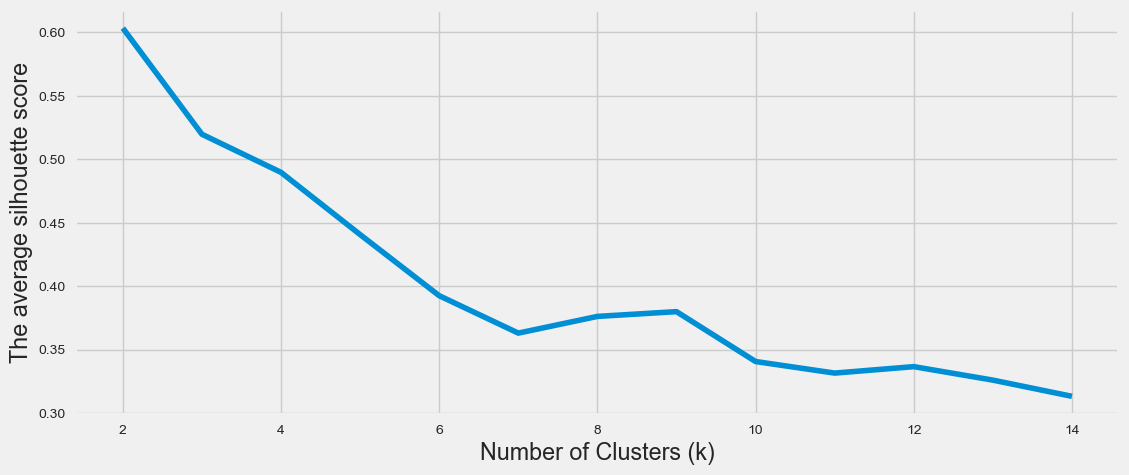

In [15]:
silhouette_avg_n_clusters = []
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='random', random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    print(f'Center`s coordinates for n_clusters {n_clusters}:\n{pd.DataFrame(clusterer.cluster_centers_).to_string()}\n')

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    # print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("The average silhouette score")
plt.show()

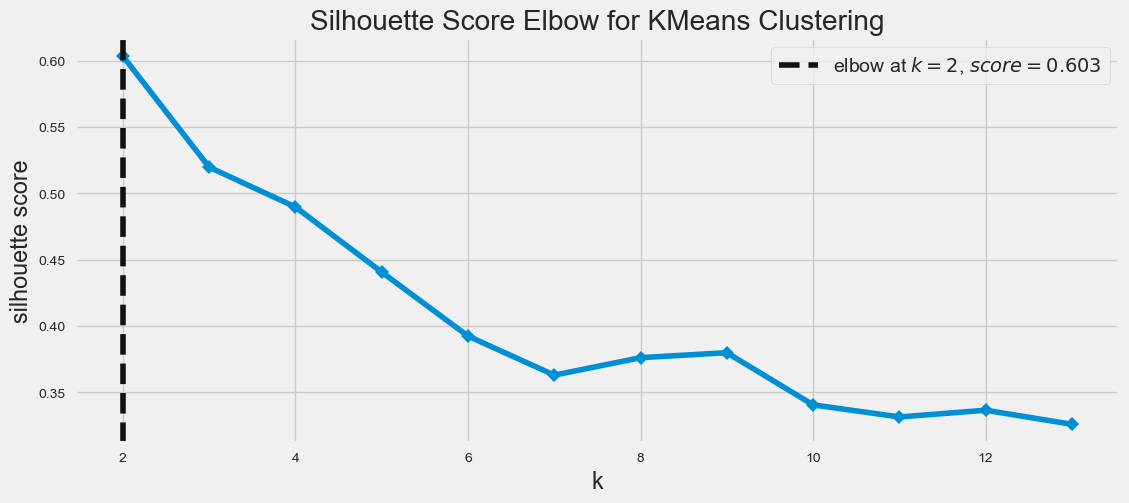

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [16]:
model = KMeans(init='random', random_state=42)
visualizer = KElbowVisualizer(
    model, k=(2,14), metric='silhouette', timings=False
)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

For n_clusters = 2 The average silhouette_score is : 0.6034220347331241
For n_clusters = 3 The average silhouette_score is : 0.5197446557038226
For n_clusters = 4 The average silhouette_score is : 0.48971967046233833
For n_clusters = 5 The average silhouette_score is : 0.44067114071766816
For n_clusters = 6 The average silhouette_score is : 0.392490880418337


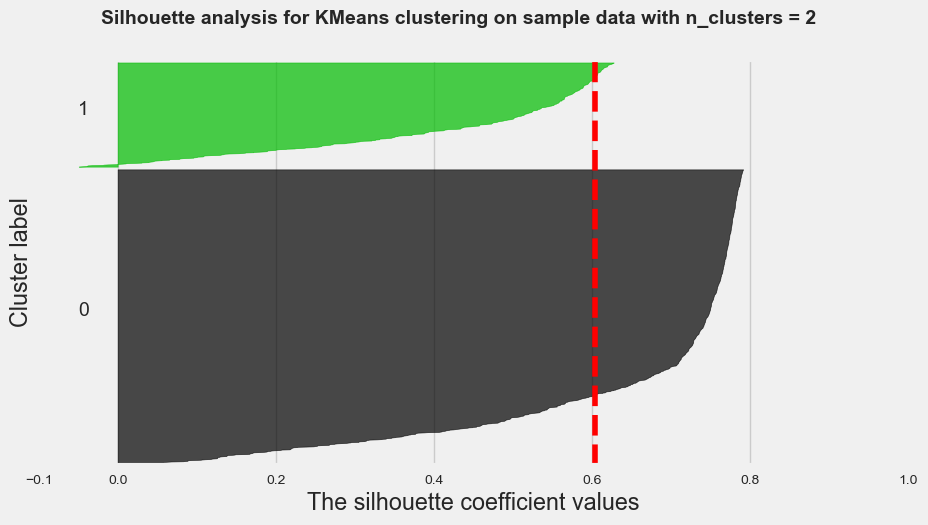

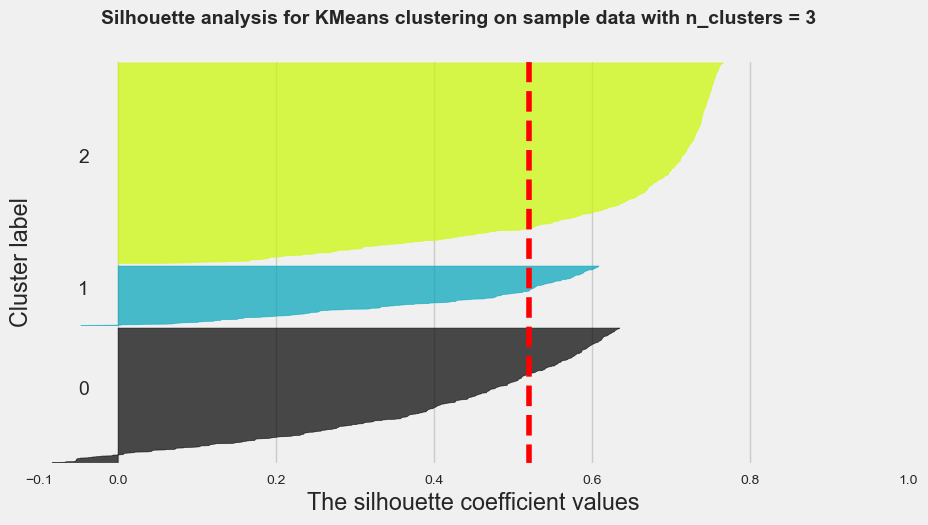

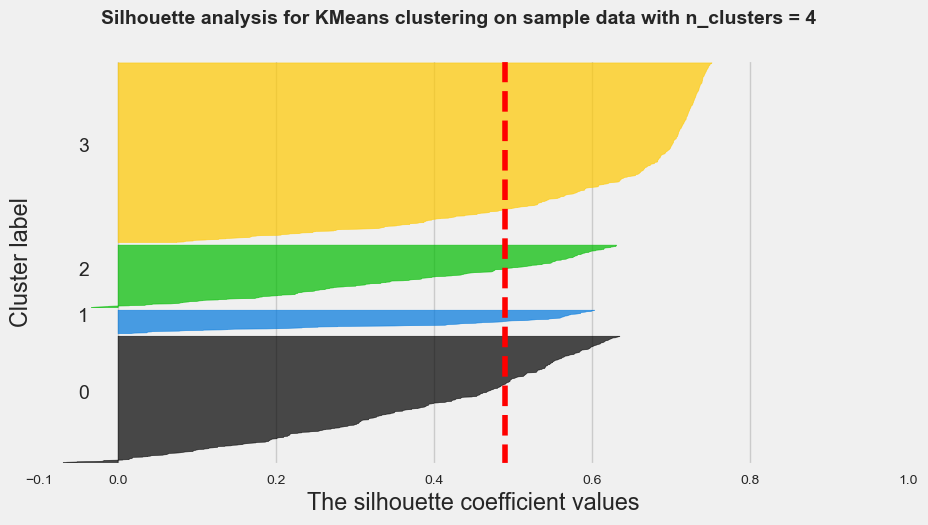

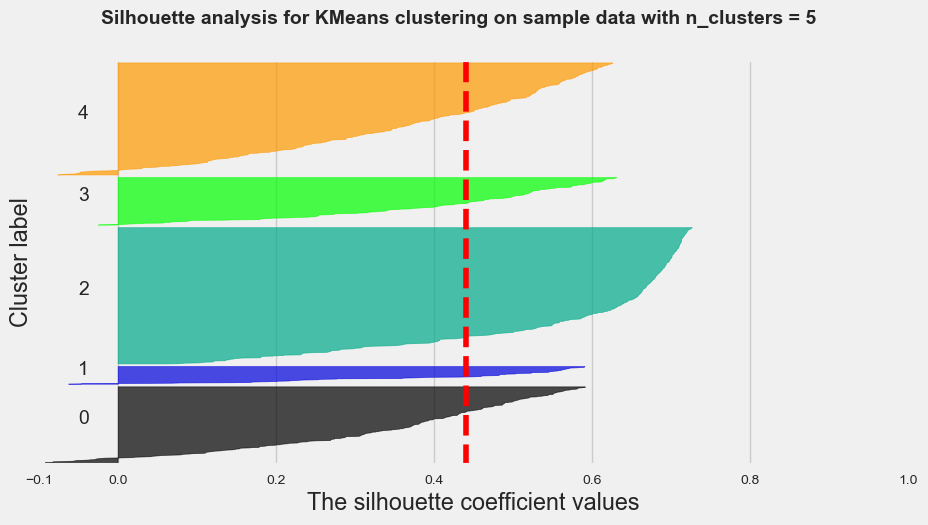

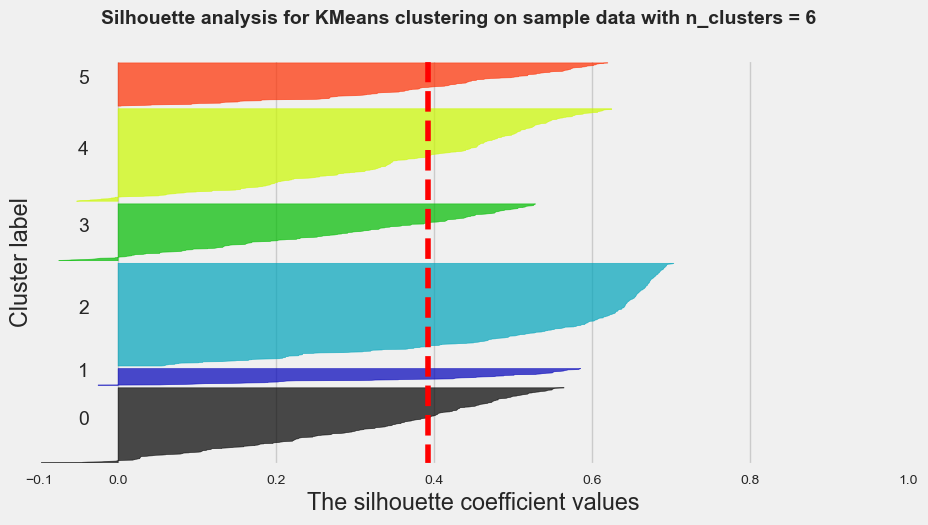

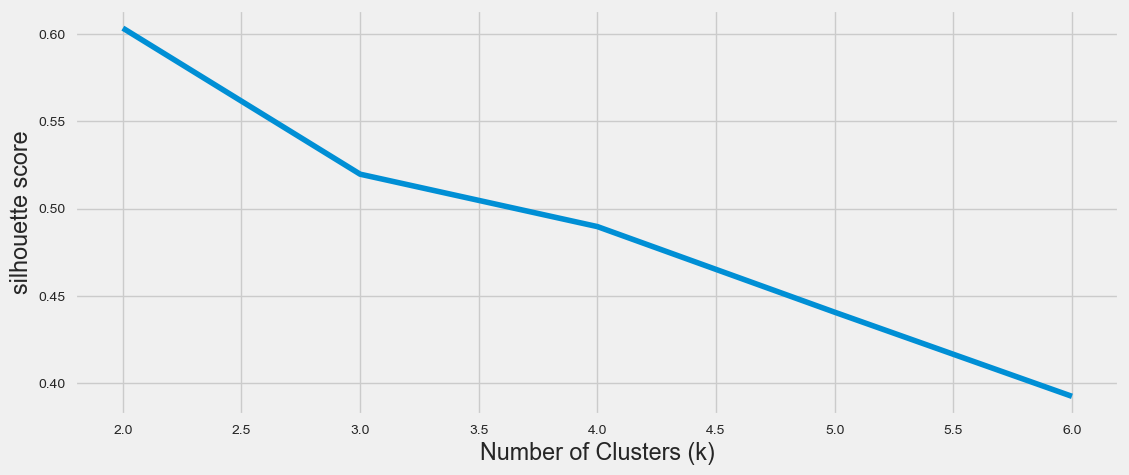

In [17]:
silhouette_avg_n_clusters = []
range_n_clusters = range(2, 7)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 column
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='random', random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

## 5.3) Prediction strength method

In [18]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, shuffle=True, stratify=y, random_state=42)

In [20]:
def get_closest_centroid(obs, centroids):
    min_distance = sys.float_info.max
    min_centroid = 0

    for c in centroids:
        dist = distance.euclidean(obs, c)
        if dist < min_distance:
            min_distance = dist
            min_centroid = c

    return min_centroid


In [21]:
def get_prediction_strength(k, train_centroids, x_test, test_labels):

    n_test = len(x_test)

    # populate the co-membership matrix
    D = np.zeros(shape=(n_test, n_test))
    for x1, l1, c1 in zip(x_test, test_labels, list(range(n_test))):
        for x2, l2, c2 in zip(x_test, test_labels, list(range(n_test))):
            if tuple(x1) != tuple(x2):
                if tuple(get_closest_centroid(x1, train_centroids)) == tuple(get_closest_centroid(x2, train_centroids)):
                    D[c1,c2] = 1.0

    # calculate the prediction strengths for each cluster
    ss = []
    for j in range(k):
        s = 0
        examples_j = x_test[test_labels == j, :].tolist()
        n_examples_j = len(examples_j)
        for x1, l1, c1 in zip(x_test, test_labels, list(range(n_test))):
            for x2, l2, c2 in zip(x_test, test_labels, list(range(n_test))):
                if tuple(x1) != tuple(x2) and l1 == l2 and l1 == j:
                    s += D[c1,c2]
        ss.append(s / (n_examples_j * (n_examples_j - 1)))

    prediction_strength = min(ss)

    return prediction_strength

  0%|          | 0/8 [00:00<?, ?it/s]

Train, center`s coordinates for n_clusters 2:
         0         1         2         3         4          5          6         7         8         9          10
0  8.096034  0.549433  0.296459  2.956091  0.095255  25.575071  91.254958  0.996983  3.290057  0.671246  10.085930
1  8.386717  0.519930  0.265270  2.386339  0.086525  12.526458  30.517279  0.996641  3.315648  0.660788  10.553492

Test, center`s coordinates for n_clusters 2:
         0         1         2         3         4          5          6         7         8         9          10
0  8.546899  0.515930  0.270620  2.421705  0.081384  12.135659  30.306202  0.996801  3.316085  0.641434  10.487145
1  7.645161  0.572097  0.212581  2.927419  0.082500  26.217742  96.951613  0.996754  3.342581  0.613710  10.125806



Train, center`s coordinates for n_clusters 3:
         0         1         2         3         4          5           6         7         8         9          10
0  7.961026  0.570821  0.293795  3.256410  0.089533  

Train, center`s coordinates for n_clusters 8:
         0         1         2         3         4          5           6         7         8         9          10
0  8.199611  0.524339  0.266693  2.442218  0.095171  19.745136   51.692607  0.996736  3.313385  0.691479  10.361673
1  8.126786  0.562143  0.317857  3.182143  0.091268  31.196429  134.482143  0.997302  3.238571  0.721250   9.719643
2  7.900000  0.300000  0.680000  8.300000  0.050000  37.500000  283.500000  0.993160  3.010000  0.510000  12.300000
3  8.682078  0.516636  0.295688  2.443766  0.085714   6.574026   16.527273  0.996643  3.297558  0.652623  10.697143
4  7.876531  0.571020  0.288673  2.684694  0.091827  19.091837   83.142857  0.996805  3.318367  0.629082  10.093367
5  8.000000  0.565069  0.289306  3.410417  0.089625  24.250000  104.208333  0.997055  3.261389  0.670556  10.046296
6  8.372381  0.492905  0.284667  2.771429  0.091238  33.600000   67.314286  0.997007  3.332857  0.679714  10.375238
7  8.145395  0.530477  0.2

[Text(0.5, 1.0, 'Determining the optimal number of clusters'),
 Text(0.5, 0, 'number of clusters'),
 Text(0, 0.5, 'prediction strength')]

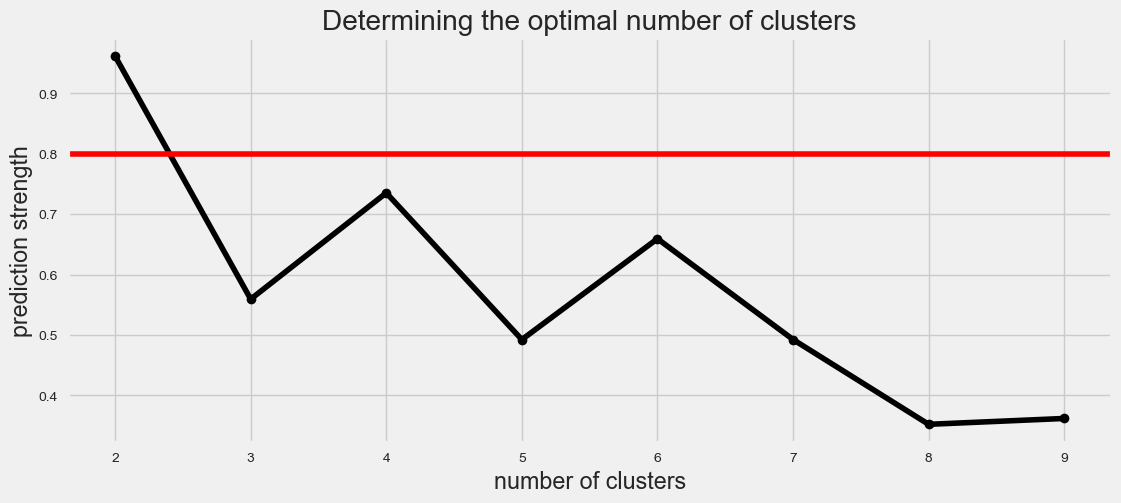

In [22]:
# running the clustering
strengths = []
range_n_clusters = range(2, 10)

for k in tqdm(range_n_clusters):
    model_train = KMeans(n_clusters=k, init='random', random_state=42).fit(X_train)
    model_test = KMeans(n_clusters=k, init='random', random_state=42).fit(X_test)

    print(f'Train, center`s coordinates for n_clusters {k}:\n{pd.DataFrame(model_train.cluster_centers_).to_string()}\n')
    print(f'Test, center`s coordinates for n_clusters {k}:\n{pd.DataFrame(model_test.cluster_centers_).to_string()}\n\n\n')

    pred_str = get_prediction_strength(k, model_train.cluster_centers_, X_test, model_test.labels_)
    strengths.append(pred_str)

# plotting
_, ax = plt.subplots()
ax.plot(range_n_clusters, strengths, '-o', color='black')
ax.axhline(y=0.8, c='red')
ax.set(title='Determining the optimal number of clusters',
       xlabel='number of clusters',
       ylabel='prediction strength')

# 6. За раніш обраної кількості кластерів багаторазово проведіть
кластеризацію методом k-середніх, використовуючи для початкової
ініціалізації метод k-means++.
Виберіть найкращий варіант кластеризації. Який кількісний критерій
Ви обрали для відбору найкращої кластеризації?

## 6.1) Elbow method

  0%|          | 0/13 [00:00<?, ?it/s]

Center`s coordinates for n_clusters 2:
         0         1         2         3         4          5          6         7         8         9          10
0  8.424258  0.519334  0.266539  2.394275  0.085446  12.371925  30.344360  0.996677  3.315522  0.656531  10.540218
1  8.025952  0.551643  0.283429  2.944524  0.093138  25.708333  91.728571  0.996943  3.298738  0.662690  10.093889

Center`s coordinates for n_clusters 3:
         0         1         2         3         4          5           6         7         8         9          10
0  8.482381  0.519446  0.270619  2.371012  0.084494   9.183333   22.955952  0.996628  3.310333  0.648333  10.589246
1  7.887552  0.572365  0.275643  3.232365  0.088398  26.151452  108.506224  0.996935  3.289627  0.652033  10.008921
2  8.256757  0.520676  0.269382  2.488224  0.091853  21.944981   55.731660  0.996851  3.322375  0.676911  10.346010

Center`s coordinates for n_clusters 4:
         0         1         2         3         4          5           

Center`s coordinates for n_clusters 12:
          0         1         2         3         4          5           6         7         8         9          10
0   8.293421  0.493289  0.291974  3.102632  0.089224  35.407895   70.144737  0.997080  3.326053  0.654605  10.260526
1   8.635505  0.506564  0.281629  2.319707  0.080752   9.879479   24.863192  0.996834  3.296840  0.676938  10.487839
2   7.966667  0.561000  0.280333  3.120000  0.085483  20.166667  111.783333  0.997116  3.266333  0.658500   9.835000
3   7.939695  0.500573  0.247176  2.346183  0.075527  28.435115   49.022901  0.996229  3.362443  0.702214  10.644656
4   8.593958  0.523369  0.287885  2.493807  0.086423   5.595166   13.981873  0.996462  3.298701  0.630453  10.751964
5   7.900000  0.300000  0.680000  8.300000  0.050000  37.500000  283.500000  0.993160  3.010000  0.510000  12.300000
6   7.813793  0.603405  0.243793  2.768966  0.087974  19.974138   88.301724  0.996939  3.337500  0.630517  10.095690
7   7.806667  0.506167  

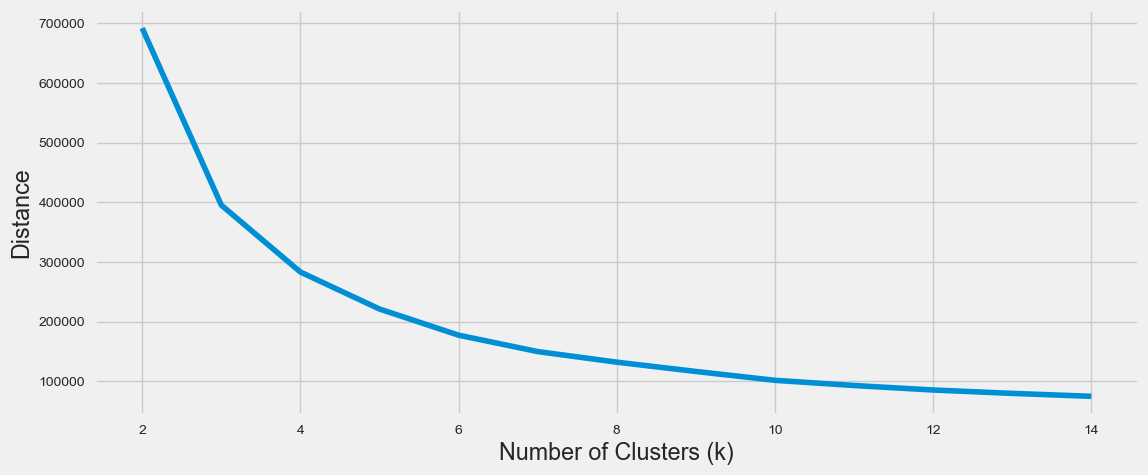

In [24]:
avg_distance = []
range_n_clusters = range(2, 15)
for n_clusters in tqdm(range_n_clusters):
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=100, random_state=42).fit(X)
    print(f'Center`s coordinates for n_clusters {n_clusters}:\n{pd.DataFrame(clusterer.cluster_centers_).to_string()}\n')

    avg_distance.append(clusterer.inertia_)

style.use("fivethirtyeight")
plt.plot(range_n_clusters, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

## 6.2) Average silhouette method

Center`s coordinates for n_clusters 2:
         0         1         2         3         4          5          6         7         8         9          10
0  8.424258  0.519334  0.266539  2.394275  0.085446  12.371925  30.344360  0.996677  3.315522  0.656531  10.540218
1  8.025952  0.551643  0.283429  2.944524  0.093138  25.708333  91.728571  0.996943  3.298738  0.662690  10.093889

Center`s coordinates for n_clusters 3:
         0         1         2         3         4          5           6         7         8         9          10
0  8.482381  0.519446  0.270619  2.371012  0.084494   9.183333   22.955952  0.996628  3.310333  0.648333  10.589246
1  7.887552  0.572365  0.275643  3.232365  0.088398  26.151452  108.506224  0.996935  3.289627  0.652033  10.008921
2  8.256757  0.520676  0.269382  2.488224  0.091853  21.944981   55.731660  0.996851  3.322375  0.676911  10.346010

Center`s coordinates for n_clusters 4:
         0         1         2         3         4          5           

Center`s coordinates for n_clusters 12:
          0         1         2         3         4          5           6         7         8         9          10
0   8.293421  0.493289  0.291974  3.102632  0.089224  35.407895   70.144737  0.997080  3.326053  0.654605  10.260526
1   8.635505  0.506564  0.281629  2.319707  0.080752   9.879479   24.863192  0.996834  3.296840  0.676938  10.487839
2   7.966667  0.561000  0.280333  3.120000  0.085483  20.166667  111.783333  0.997116  3.266333  0.658500   9.835000
3   7.939695  0.500573  0.247176  2.346183  0.075527  28.435115   49.022901  0.996229  3.362443  0.702214  10.644656
4   8.593958  0.523369  0.287885  2.493807  0.086423   5.595166   13.981873  0.996462  3.298701  0.630453  10.751964
5   7.900000  0.300000  0.680000  8.300000  0.050000  37.500000  283.500000  0.993160  3.010000  0.510000  12.300000
6   7.813793  0.603405  0.243793  2.768966  0.087974  19.974138   88.301724  0.996939  3.337500  0.630517  10.095690
7   7.806667  0.506167  

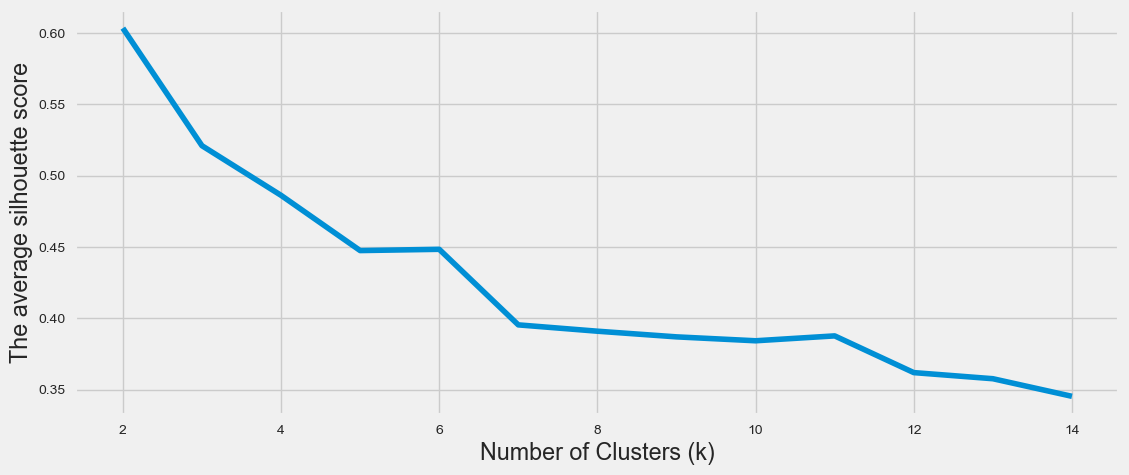

In [25]:
silhouette_avg_n_clusters = []
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=100, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    print(f'Center`s coordinates for n_clusters {n_clusters}:\n{pd.DataFrame(clusterer.cluster_centers_).to_string()}\n')

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    # print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("The average silhouette score")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6034220347331241
For n_clusters = 3 The average silhouette_score is : 0.5209776312111326
For n_clusters = 4 The average silhouette_score is : 0.48617291416050135
For n_clusters = 5 The average silhouette_score is : 0.4474368189327113


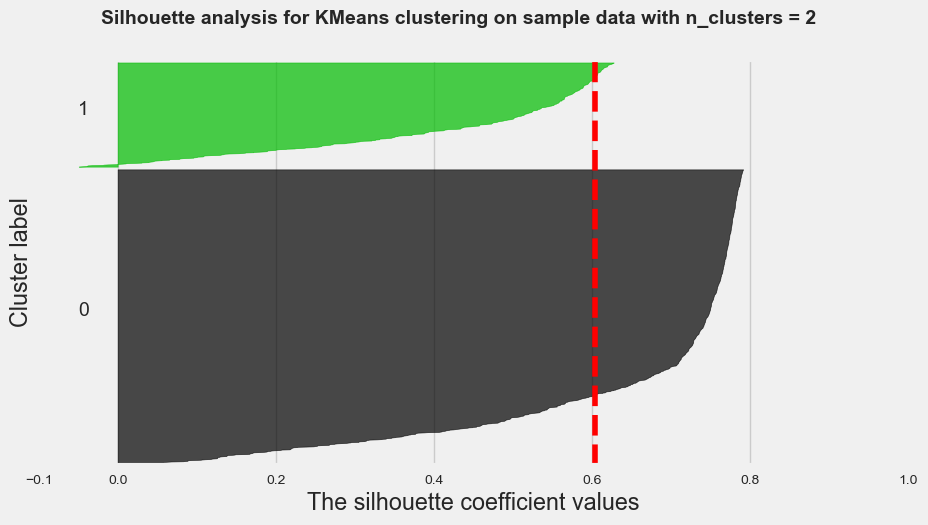

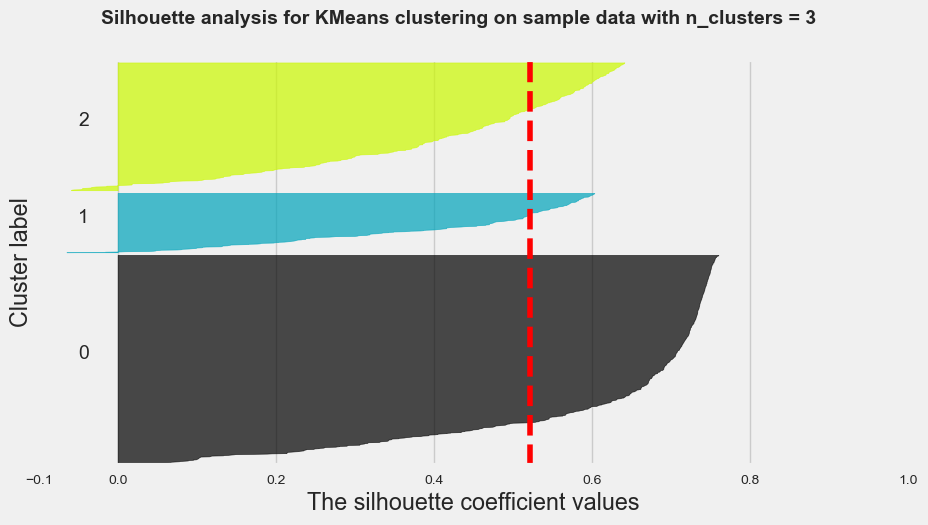

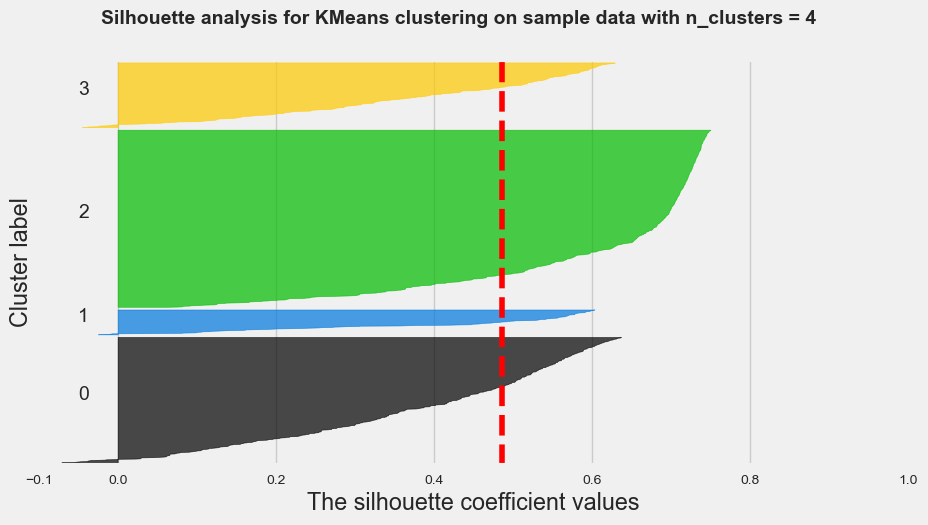

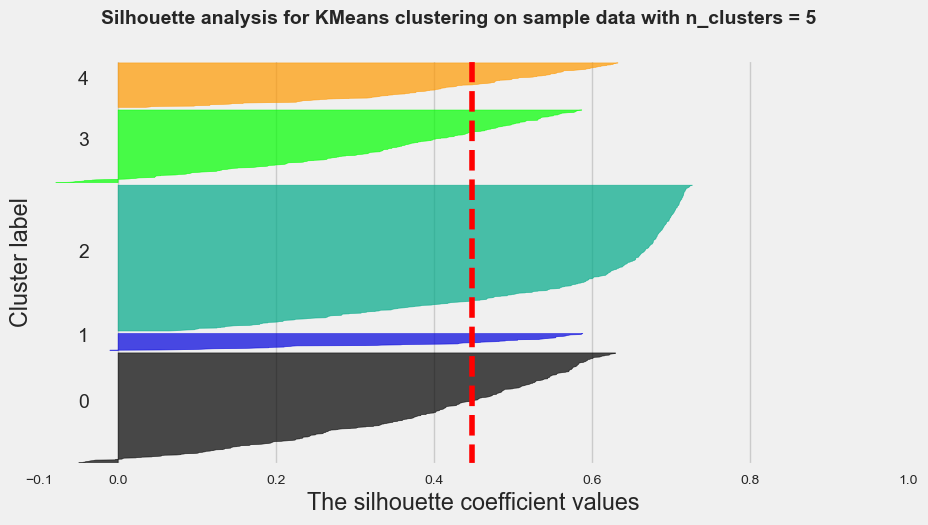

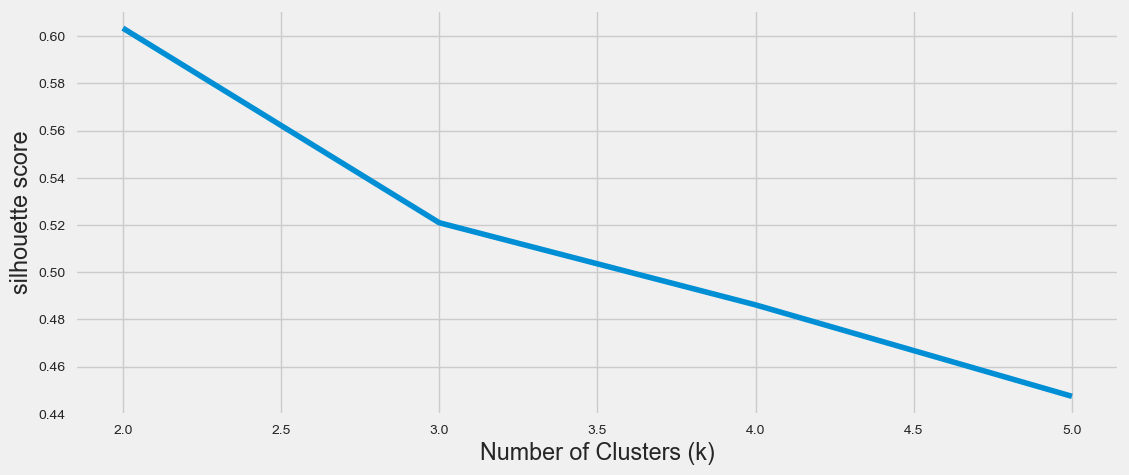

In [26]:
silhouette_avg_n_clusters = []
range_n_clusters = range(2, 6)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 column
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=100, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

## 6.3) Prediction strength method

  0%|          | 0/5 [00:00<?, ?it/s]

Train, center`s coordinates for n_clusters 2:
         0         1         2         3         4          5          6         7         8         9          10
0  8.386717  0.519930  0.265270  2.386339  0.086525  12.526458  30.517279  0.996641  3.315648  0.660788  10.553492
1  8.096034  0.549433  0.296459  2.956091  0.095255  25.575071  91.254958  0.996983  3.290057  0.671246  10.085930

Test, center`s coordinates for n_clusters 2:
         0         1         2         3         4          5          6         7         8         9          10
0  8.546899  0.515930  0.270620  2.421705  0.081384  12.135659  30.306202  0.996801  3.316085  0.641434  10.487145
1  7.645161  0.572097  0.212581  2.927419  0.082500  26.217742  96.951613  0.996754  3.342581  0.613710  10.125806



Train, center`s coordinates for n_clusters 3:
         0         1         2         3         4          5           6         7         8         9          10
0  8.448837  0.522217  0.267643  2.362403  0.085155  

[Text(0.5, 1.0, 'Determining the optimal number of clusters'),
 Text(0.5, 0, 'number of clusters'),
 Text(0, 0.5, 'prediction strength')]

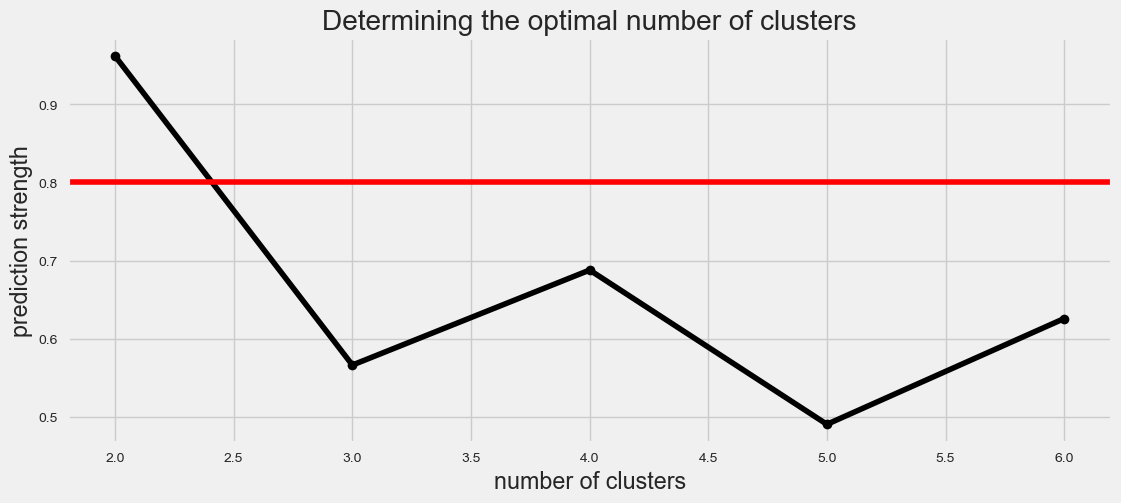

In [27]:
# running the clustering
strengths = []
range_n_clusters = range(2, 7)

for k in tqdm(range_n_clusters):
    model_train = KMeans(n_clusters=k, init='k-means++', n_init=100, random_state=42).fit(X_train)
    model_test = KMeans(n_clusters=k, init='k-means++', n_init=100, random_state=42).fit(X_test)

    print(f'Train, center`s coordinates for n_clusters {k}:\n{pd.DataFrame(model_train.cluster_centers_).to_string()}\n')
    print(f'Test, center`s coordinates for n_clusters {k}:\n{pd.DataFrame(model_test.cluster_centers_).to_string()}\n\n\n')

    pred_str = get_prediction_strength(k, model_train.cluster_centers_, X_test, model_test.labels_)
    strengths.append(pred_str)

# plotting
_, ax = plt.subplots()
ax.plot(range_n_clusters, strengths, '-o', color='black')
ax.axhline(y=0.8, c='red')
ax.set(title='Determining the optimal number of clusters',
       xlabel='number of clusters',
       ylabel='prediction strength')

# 7. Використовуючи функцію AgglomerativeClustering
бібліотеки scikitlearn, виконати розбиття набору даних на кластери. Кількість кластерів обрати такою ж самою, як і в попередньому методі. Вивести
координати центрів кластерів.

## 7.1) Elbow method

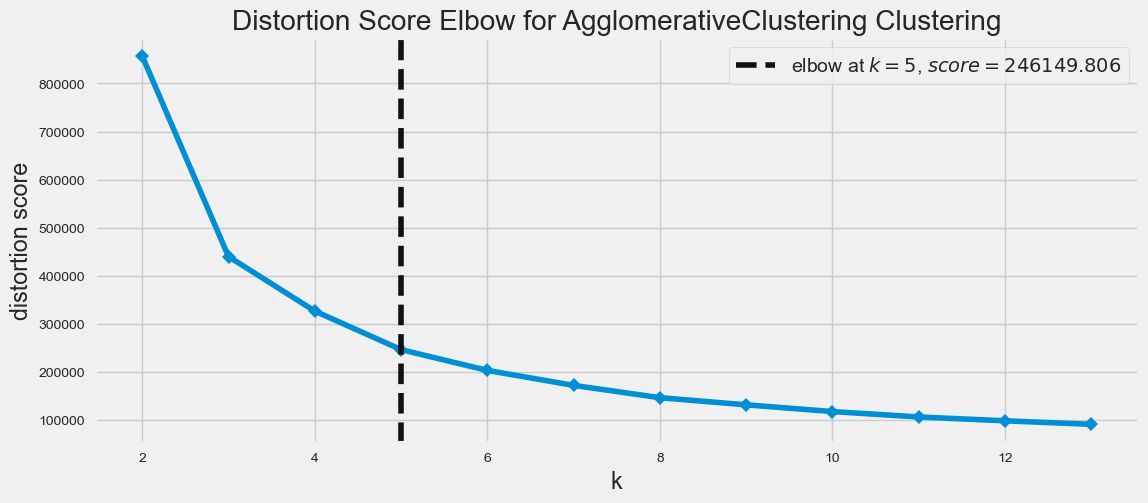

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Instantiate the clustering model and visualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(
    model, k=(2,14), metric='distortion', timings=False
)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

## 7.2) Average silhouette method

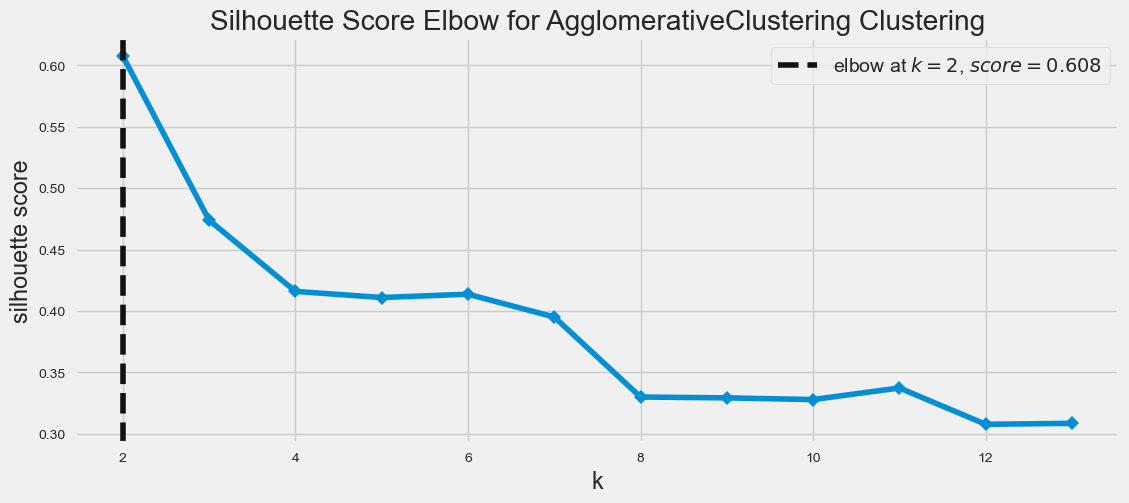

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [29]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(
    model, k=(2,14), metric='silhouette', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

## 7.3) Prediction strength method

In [ ]:
# running the clustering
strengths = []
range_n_clusters = range(2, 10)

for k in tqdm(range_n_clusters):
    model_train = AgglomerativeClustering(n_clusters=k).fit(X_train)
    model_test = AgglomerativeClustering(n_clusters=k).fit(X_test)

    # Computing cluster centers, which are simply the mean of all the rows in that cluster
    # many thanks to https://tushar-osc.medium.com/agglomerativeclustering-with-cluster-centers-e5d409c724d1
    train_cluster_centers = []

    for j_cluster in range(model_train.n_clusters):
        j_cluster_center = X_train[model_train.labels_==j_cluster,:].mean(axis=0)
        train_cluster_centers.append(j_cluster_center)

    print(f'Center`s coordinates for n_clusters {k}:\n{pd.DataFrame(train_cluster_centers).to_string()}\n\n')

    pred_str = get_prediction_strength(k, train_cluster_centers, X_test, model_test.labels_)
    strengths.append(pred_str)

# plotting
_, ax = plt.subplots()
ax.plot(range_n_clusters, strengths, '-o', color='black')
ax.axhline(y=0.8, c='red')
ax.set(title='Determining the optimal number of clusters',
       xlabel='number of clusters',
       ylabel='prediction strength')

Краткое содержание
    Мы получили оптимальное n_clucters=5, используя elbow method. Тогда average silhouette method показал наилучшую метрику при n_clucters=2, но мы выбрали диапазон 3-4. Последний метод показал, что только n_clucters=2 превышает порог силы предсказания 0,8. Второй лучший результат был посвящен n_clucters=5.

Удивительно, что при n_cluster=5 тренд графика "the average silhouette method" ломается, но elbow method предлагает такое же значение для n_clucters, а также для "силы прогноза" (в случае, если мы хотим более 2 кластеров).

## 8. Порівняти результати двох використаних методів кластеризації. 
Ранее мы уже сравнивали подходы K-средних и K-средних++. Давайте сравним K-means++ и AgglomerativeClustering. Последний вывод в разделе K-means++ заключался в том, что два лучших значения n_cluster — это 2 и 4. AgglomerativeClustering показывает то же самое первое значение 1, но вторым является n_cluster = 5.

Подводя итог, можно сказать, что разница между K-means++ и AgglomerativeClustering не кажется существенной с точки зрения оптимальных значений n_clusters.
